# Python use examples for the Phys 43x labs

***By Prof. Marjorie Olmstead, Summer 2021***

These are sorted by topic, roughly in the order you need to use them when looking at and analyzing a set of data.  Print formatting is near the end, and the last section is going through an example from start to finish.

## Logistics

The cells (boxes) in your notebook are primarily either text (Markdown; blue in the sidebar) or code (green in the sidebar).  

To **run the command box** or **process your Markdown language**:

- `ctrl-enter` (JupyterHub) or `command-enter`(Mac): run and stay on that cell
- `shift-enter`: run and go to the next cell (Same as hitting the `>Run` key at the top)
- `alt-enter` (PC) or `option-enter`(Mac): run cell and create a new cell beneath it

The hashtag character # in a code cell denotes that everything to the right of it is a comment.  Commented code is essential.  It needs to be clear either from the code box itself or the Markdown box above/below it what your code it doing.

The number in brackets before a code cell tells you the order in which the code has been run.  `[*]` means that box is in progress.

To clear everything and run again from the top as command `[1]`, click on the `>>` box at the top, or use the commands under the "Kernel" menu. 

The `Run All (above or below)` options in the "Cell" menu run the commands without resetting any variables - the next line will get a command number one higher than the last one.  If you want to clear your variables first, type `esc-0 0` before running.

Note that when you close and reopen a notebook, the various objects (variables and arrays) become undefined.  You need to re-run the notebook - you can't just pick up again where you left off.  

You can run your code from the various menus and buttons at the top of your notebook page.  There are a number of keyboard shortcuts (see list under the Help menu) - hold down the `escape key` as you type them to be in command mode.  Some commonly used commands using the escape key

- `esc-M` switches a cell to Markdown (text)
- `esc-Y` switches a cell to Code
- `esc-0 0` clears the system, but doesn't run anything.
- `esc-I I` aborts running code (same as the button with the square)
- `esc-A` insert cell above
- `esc-B` insert cell below (same as the button with the `+`)

A few useful Markdown commands (for more, follow the link under Help menu):

- to add a heading, start the line with hashtags.  `# level 1`; `## level 2`; `### level 3`; etc.
- to get a bulleted paragraph, type hyphen and then space, `- indented with bullet`.  If you put spaces before the hyphen, it then goes to the next level of indent.  As you put it in, it will be color coded by indent level.
- to put something in **bold** type, surround it with double asterisks `**bold**`
- to put something in *italics*, surround it with single asterisks `*italic*`
- to have something in a gray box to denote code, surround it with the backtick (upper left of most keyboards)
- to type an inline latex equation, put it in dollar signs `$inline equation$`
- to have a centered equation on its own line, put it in double dollar signs, `$$centered equation$$`
- to force a line break, leave an empty line (hit return twice)
- to have indented courier font for a few lines of code, start and end with a line containing three backticks.




## Initiate the environment

When you have just cleared with `esc-0 0` (or opened your file for a new time if running on your home computer), you need to run the commands in the next cell to call in assorted packages and assign their aliases. 

In [1]:
import numpy as np                 #for conducting numerical operations on arrays, etc.
import scipy.constants as const    #stores various physical constants
import uncertainties as unc        #to treat values with their uncertainties as a single object
import matplotlib.pyplot as plt    #for plotting graphs
import pandas as pd                #for data input/output, among other things
%matplotlib inline
from uncertainties import ufloat,unumpy  #for uncertainty object creation/manipulation
from uncertainties.umath import *  #for math on uncertainty objects

# Loading in Data

## Directory info

If you are working in JupyterHub, your files are obvious in the window to the left of your notebook, and you can find them by clicking on the various folders.  If you are working on your own computer instead of the JupyterHub (after installing Anaconda on your machine), it useful to check what directory you are in, change it if necessary, and then list the files in that directory so you can check to see if the one you want is there (or what it's actual name is).
Since these are line commands in the unix shell, rather than Python, you need to put each in their own command line to run (there are likely other ways, but this works).  If you include a comment in the cell, start your command with %

- `pwd` = print working directory
- `cd` = change directory
- `cd ..` = change to the directory that contains the current working directory
- `cd dir` = change to the directory dir
- `ls` = list files
- `ls -l` = list files with their attributes

In [2]:
pwd

'/home/jovyan/Resource Files'

In [3]:
# list the files
%ls

'Lab Commands.ipynb'   minute2.csv   testdata.csv   threetrial.csv


In [4]:
# list the files with their size, permissions, and date information
%ls -l

total 384
-rw-r--r-- 1 jovyan users 380084 Jun 17 19:50 'Lab Commands.ipynb'
-rw-r--r-- 1 jovyan users    112 Jun 17 19:29  minute2.csv
-rw-r--r-- 1 jovyan users    238 Jun 17 17:03  testdata.csv
-rw-r--r-- 1 jovyan users    387 Jun 17 19:26  threetrial.csv


## Extracting data from csv file

### Read in the file

The command to **read in data from a csv file** is in the Pandas library.  Look at Pandas documentation (linked from the Help menu) to read in other types of files.

- `mydata = pd.read_csv('myfile.csv')`  Note this is case sensitive in finding your file.

The equals sign has assigned the text information in your file to the object `mydata`.

A general rule for code is that text is in single quotes, as `'text'`.  If there are no quotes, Python looks for a variable or other object with that name.  Thus an alternate way of reading in your file is to assign the filename to an object as text, and then use the object in the open command:

- `myfile = 'myfile.csv'`
- `mydata = pd.read_csv(myfile)`

For now, `mydata` is a text object similar to your original file.  To view the whole file as a formatted table, end your box with the line `mydata`

In [5]:
#Read in a csv file of data, and then print the first 5 lines of the file on the screen
mydata=pd.read_csv('testdata.csv')
mydata

,Time (min:sec),Voltage (V)
0,0:00,0.00
1,0:10,1.76
2,0:20,3.21
3,0:30,4.39
4,0:40,5.35
5,0:50,6.16
6,1:00,6.80
7,1:10,7.35
8,1:20,7.77
9,1:30,8.12


For long data files, this can be cumbersome.  It is useful, however, to check you have what you want by printing the first few or last few lines.

To limit to just the first *N* lines, use `.head(N)`

- `mydata.head(N)`

or the last *N* lines with `.tail(N)`

- `mydata.tail(N)`

Note that in all cases printing elements of `mydata` also prints the titles (extracted from your first row, if the titles exist) and the row numbers (starting with 0, so that the first row is labelled 0 and the Nth row is labelled N-1).

This is a general structure in Python - to do some action on an object by appending `.action`

In [6]:
#print just the first 5 lines of the file on the screen 
mydata.head(5)

,Time (min:sec),Voltage (V)
0,0:00,0.00
1,0:10,1.76
2,0:20,3.21
3,0:30,4.39
4,0:40,5.35


In [7]:
# print the last 5 lines - useful for figuring out the size of your dataset
mydata.tail(5)

,Time (min:sec),Voltage (V)
14,2:20,9.12
15,2:30,9.26
16,2:40,9.31
17,2:50,9.41
18,3:00,9.46


The next cell in an example of the alternate approach of using an object to store your file name (useful if you will be reading in multiple files).

In [8]:
myfile = 'testdata.csv'
mydata2 = pd.read_csv(myfile)
mydata2.head(5)

,Time (min:sec),Voltage (V)
0,0:00,0.00
1,0:10,1.76
2,0:20,3.21
3,0:30,4.39
4,0:40,5.35


### Extract information from the data you read in


The object `mydata` now contains the text that was in the file testdata.csv, extracted by parsing at commas.  


If the top line looks different, read_csv stores the top line as titles.  You can pull out a column of data if you know its title.  

To **extract the titles** into a file of their own:

- `titlelist = mydata.columns`

In [9]:
titlelist = mydata.columns
titlelist

Index(['Time (min:sec)', 'Voltage (V)'], dtype='object')

It calls this an Index (the contents are used to index the columns in the table) and the datatype is object (text rather than a number).

To figure out the **number of rows and columns** in your array, use `shape`.  This creates an array that is as long as the number of dimensions.

To select the size of the dimension you care about: `[]` or `[0]` is the number of rows (length of each column) and `[1]` is the number of columns (length of each row).  More dimensions won't be needed in PHYS 431:

- `rows = mydata.shape[0]`
- `columns = mydata.shape[1]`

In [10]:
# extract size of array
rows = mydata.shape[0]
cols = mydata.shape[1]
print('data pts =',rows,'; data per pt =',cols)
mydata.shape

data pts = 19 ; data per pt = 2


(19, 2)

Note that I just used the `print()` command to see the results of my calculation with some information I supplied.  The method of printing by just including the name of the object only works if the line is the last one in the cell, and doesn't allow you to format things.  See below for the section Formatted Printing.  For now, you just need to know that `print()` prints to the terminal what is in parentheses.  Text in 'single quotes' gets passed through, and objects (variables) have their current value printed.

To **extract a particular column** from your table, you use the title of the column. 

- `mydata['title']`

To **extract the Nth data point** or the **range from N to M** in column 'title':

- `mydata['title'][N-1]`
- `mydata['title'][N-1:M]`

Note again that all references start with 0 as the first value, so the Nth datapoint is labelled N-1.  In general for a 2D table or array, the first set of `[brackets]` is the column info, and the second is the rows.

Within the brackets, `[N:M]` refers to the data points N+1 through M.  If the first number is missing, it is assumed to be N=0; if the second is missing it is assumed to be M = last row.  All the data would then be `[:]`.

In [11]:
# print the time and voltage for the 5th data point
print('time =',mydata['Time (min:sec)'][4],';  voltage=',mydata['Voltage (V)'][4]," Volts")

time = 0:40 ;  voltage= 5.35  Volts


That last line got a bit long - Python is smart enough that if you break a line that has parentheses without closing those parentheses, it indents and considers the whole thing as one line.  In general, an indented line is considered a continuation of the previous one.

In [12]:
# print the time and voltage for the 5th point again, breaking the print command in half
print('time =',mydata['Time (min:sec)'][4],
      ';  voltage=',mydata['Voltage (V)'][4]," Volts")

time = 0:40 ;  voltage= 5.35  Volts


In [13]:
# extract 5th and 6th data point for time
mydata['Time (min:sec)'][4:6]     #using a range of points

4    0:40
5    0:50
Name: Time (min:sec), dtype: object

You can use the object we used to extract the titles up above as **shorthand for the column title** if you don't want to keep track of exactly what you called each column (which is case sensitive) when you saved the data initially.

In [14]:
# repeating last command using titlelist[0] to refer to 'Time (min:sec)'
print('first object in titlelist:',titlelist[0])
mydata[titlelist[0]][4:6]  

first object in titlelist: Time (min:sec)


4    0:40
5    0:50
Name: Time (min:sec), dtype: object

To convert a column of **text into a number**, it is straightforward if the text looks like numbers:

- `signal = mydata['title2']`

In [15]:
# generate a 1D array of the signal
signal = mydata['Voltage (V)']
signal.head(5)

0    0.00
1    1.76
2    3.21
3    4.39
4    5.35
Name: Voltage (V), dtype: float64

Note it identifies the new object `signal` as a floating point datatype.  If none of the numbers has a decimal point, it will make them integers.

If there are non-numerical characters, however, such as in the min:sec column, it keeps the array as text.
- `textdata = mydata['textcoltitle']`

In [16]:
# extract the text from the min:sec column

time_txt=mydata['Time (min:sec)']
time_txt.tail(5)  #show the last 5 time values

14    2:20
15    2:30
16    2:40
17    2:50
18    3:00
Name: Time (min:sec), dtype: object

Note the datatype is now "object" instead of "float64", since it is still text.

### Parse text into numbers

If the text needs to be parsed to turn it into numbers, you can use the `split` command.  `split` eliminates the text that is the argument of `split('txt')` and puts the segments into an array.  (Note, this is essentially what the read_csv command does with commas.)  If there are units at the end of the data you read in, then select the unit as the argument of split and take what comes beforehand.

  **Split Text**

- `textdata.split('txt')[0]` extracts the text to the left of the the first incidence of `'txt'`

- `textdata.split('txt')[M]` extracts the text between the M-1 and M incidence of `'txt'`

The result of this is still text. 

To turn **text into a floating point** number: use the `float` command.

- `value = float(textnumber)`

The `float` command works on an individual text value, and doesn't allow us to convert the whole column of text at once.  To convert an entire column of text, we need to:

  - create a floating point array, 
  - load it up one row at a time with a for loop 

For the example file, we need to create separate floating point numbers from the minutes and seconds part of the text, and do the math to multiply the minutes component by 60 and add to the seconds.

**Create a blank array**

Arrays are more efficient than general objects since they always contain numbers, so the system doesn't have to keep converting from text to numbers.  The simplest is to create one using numpy and load it with zeros (you will update later).  

To **create an array of length *N***,

- `myarray = np.zeros(N)`

If you would rather, you can load it with ones:

- `myarray = np.ones(N)`

**Populate the array from your text data**
   
You can't just equate the array and the objects - you need to do the conversion one row at a time.  Thus, you need to set up a **for loop**.  

- **for loop** 

The for loop has the syntax

- `for x in range(n,m):`
    - `array[x]=expression1`

The **for loop** executes the code following it for the conditions given in the first line. In this case, for x = n, n+1, n+2, ..., m-1, which is what the `range` command specifies.  Note the loop doesn't have an end line - you start the list of commands to execute by ending the first line with a colon; you end the list by stopping the indent.

The set of values you run over in the loop can be anything.  For example, you could read in lots of files by putting a list of their names (or use wild cards with asterisk `*`) into an object called filelist, and then having `for myfile in filelist:` followed by the command to read in the files.

The example below determines the size of the time array, creates it, then processes the text in the form min:sec to find the seconds and add 60 $\times$ minutes.  For descriptions of various math operations, see a later section.

In [17]:
# create an array for the numbers and populate it with zeros

rows=mydata.shape[0]     # figure out how long to make the array
time_sec=np.zeros(rows)  # make the array

# set up a loop extracting seconds and minutes from the txt array extracted above with ':' as the split txt
# multiply minutes by 60 and add to seconds

for x in range(rows):                                 # note the implied 0 in range(n,m) n=0 if missing
    time_sec[x]=float(time_txt[x].split(':')[1])      # [1] takes the part after the colon (sec)
    time_sec[x]+=60*float(time_txt[x].split(':')[0])  # [0] is before : (min); a+=b is a short hand way of a=a+b
    
# print a few relevant rows to make sure it worked

for x in range(4,8):            #this prints rows 5, 6, 7, 8
    print('text ', time_txt[x],';  sec ', time_sec[x])  
    
# see that it is an array
time_sec

text  0:40 ;  sec  40.0
text  0:50 ;  sec  50.0
text  1:00 ;  sec  60.0
text  1:10 ;  sec  70.0


array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
       110., 120., 130., 140., 150., 160., 170., 180.])

## Combine data or create subsets

**Combine columns of data into a single object.**

If you have read in data from multiple sources, or created a new object based on your data (e.g., you entered angle, and you created an array with sin(angle)), you might want to put all the data into a single matrix array.  To take two columns of length *N* and create a new $2\times N$ array from them:

- `array2D=np.array([firstcol,secondcol])`

This also works for a bigger matrix

- `arrayND = np.array([col1,col2,col3,...,colN])`


In [18]:
# take the time in seconds and the voltage and put them into a 2D floating point array

xydata=np.array([time_sec,signal])

for x in range(4,8):            #this prints rows 5, 6, 7, 8
    print('time ', xydata[0][x],'signal', xydata[1][x])  
    
# see what the array looks like (which is how you could type it in element by element)
xydata

time  40.0 signal 5.35
time  50.0 signal 6.16
time  60.0 signal 6.8
time  70.0 signal 7.35


array([[  0.  ,  10.  ,  20.  ,  30.  ,  40.  ,  50.  ,  60.  ,  70.  ,
         80.  ,  90.  , 100.  , 110.  , 120.  , 130.  , 140.  , 150.  ,
        160.  , 170.  , 180.  ],
       [  0.  ,   1.76,   3.21,   4.39,   5.35,   6.16,   6.8 ,   7.35,
          7.77,   8.12,   8.39,   8.67,   8.82,   9.02,   9.12,   9.26,
          9.31,   9.41,   9.46]])

You can **extract a subset of your data** into a smaller array, as well.  If you have a large array `bigarray`, you can **extract the N+1 to Mth data points** into a smaller array with:

- `subarray=np.zeros(M-N)`
- `subarray=bigarray[N:M]`

In [19]:
# extract time for just the second minute
time_min2=np.zeros(6)
time_min2=time_sec[6:12]
time_min2

array([ 60.,  70.,  80.,  90., 100., 110.])

You can **extract data from the $P^{th}$ column of a 2D array**:
- `subarray2=np.zeros(M-N)`   1D array M-N points long
- `subarray2=2Darray[P-1,N:M]`  pull out points N+1 through M and put it into subarray2

Another way to pull a whole column
- `subarray3=np.zeros(2Darray.shape[0])`  a new 1D array with the same number of rows as 2Darray
- `subarray3 = 2Darray[P-1,:]`   a single colon `:` means the whole column.

In [20]:
# volts for second minute
sig_min2=np.zeros(6)
sig_min2=xydata[1,6:12]     #extract points 7 to 12 from the 2nd column of xydata
sig_min2

array([6.8 , 7.35, 7.77, 8.12, 8.39, 8.67])

## Create DataFrame and export to csv

You can create a **data frame** (using pandas) with your columns of data and give them titles.  Each column can have different properties (text, floating point, value with its uncertainty)

- `data_df = pd.DataFrame()`
- `data_df['Title0'] = [x1,x2,x3,x4,x5,x6]`
- `data_df['Title1'] = array1`

One nice thing about a dataframe is you can just keep adding columns to it.

In [21]:
# make a dataframe of the 2nd minute data, labelling the data points a,b,c,d,e,f

minute2_df = pd.DataFrame()                        # create the empty dataframe
minute2_df['Point'] = ['a','b','c','d','e','f']    # create a column "Point" and fill it with 6 letters
minute2_df['Time (s)'] = time_min2                 # create a column "Time (s)" and fill it with time_min2
minute2_df['Signal (V)'] = sig_min2                # again for the voltage signal

# print the frame as a nice table
minute2_df

,Point,Time (s),Signal (V)
0,a,60.0,6.80
1,b,70.0,7.35
2,c,80.0,7.77
3,d,90.0,8.12
4,e,100.0,8.39
5,f,110.0,8.67


You are now ready to go full circle to **save dataframe as a csv file**.

- `data_df.to_csv('fileout.csv')`

In [22]:
# save data frame to a csv file
minute2_df.to_csv('minute2.csv')

In [23]:
# check it has been saved (or just look in your list of files at the left)
%ls -l

total 384
-rw-r--r-- 1 jovyan users 380084 Jun 17 19:50 'Lab Commands.ipynb'
-rw-r--r-- 1 jovyan users    112 Jun 17 19:50  minute2.csv
-rw-r--r-- 1 jovyan users    238 Jun 17 17:03  testdata.csv
-rw-r--r-- 1 jovyan users    387 Jun 17 19:26  threetrial.csv


# Plotting Data

In general, plotting data is one of the best ways to get a handle on it.  We will use `matplotlib` for plotting, which we defined back in cell `[1]` as `plt`.  

You can get a quick, autoscaled plot of ydata vs. xdata to check something with the simple command:
- `plt.plot(xdata,ydata)`

This, of course, is not appropriate for your final product.  That should have such features as labels on your axes, a title for your graph, error bars, grid lines, a legend, appropriate aspect ratio and axes limits for the data, etc.

## Commands

Basic commands are:
 - `plt.figure(figsize=(x,y))` makes the figure x units wide, y units high.  The default is 6 x 4.
 - `plt.grid()` adds grid lines to the plot
 - `plt.title('Title')` adds a title of what is in 'quotes'.  Note that the text in 'quotes' can include what ever you type (including symbols or Greek) by typing them directly from your computer keyboard.  It doesn't do Latex well. 
 - `plt.ylabel('Y Label')` labels the Y axis
 - `plt.xlabel('X Label')` labels the X axis
 - `plt.xlim(left,right)` sets the range of the x axis (left and right are numbers)
 - `plt.ylim(bot,top)` sets the range of the y axis
 - `plt.plot(xarray,yarray,'sb',label='id')` plots yarray vs xarray with squares (s) that are blue (b) and calls it 'id' in the legend. 
 -- The first character is shape: s for square, o for circle, - for line, . for dots, d for diamond, ^ for triangle.  
 -- The second character is color:  b for blue, r for red, g for green, k for black, p for purple
 -- The label is what goes in a legend should you have one.
 - `plt.plot(xyarray['xtitle'][n:m],array['ytitle'][n:m],'.')` plots the data in an array in the range n+1 to m from the column with title 'ytitle' vs the column with the title 'xtitle', as dots
 - `plt.errorbar(xarray2, yvalues,yerr=yerrors,fmt='or',label='id')` plots with yerrors used as error bars on the y data, with points having format in fmt
 - `plt.legend(title='optionaltitle')` adds a legend using the labels and data pt types (with 'optionaltitle' at the top if desired; if not, just use `plt.legend()`
 - `plt.xscale("log")` makes the x-axis logarithmic (same works for y)
 - `plt.yscale("linear")` makes the y-axis linear (the default if not included)
 - end the last command with a semicolon to note that you are done.
 
 If you want to plot just a range of data, and that range might change, it is simplest to define a range as an object that you change at the top of your code instead of having to change all the times it shows up.
 
   - `index = list(range(N,M,P))`   produces the integers from N to M-1 in steps of P and stores it in index.  (default for P is 1)
 
   - `plt.plot(xarray[index],yarray[index],'.')` plots dots for points N+1 to M of the array, taking only every $\rm{P^{th}}$ point 
 
 To do something else, check out https://matplotlib.org/stable/index.html
 
Below are a few examples.

## Examples

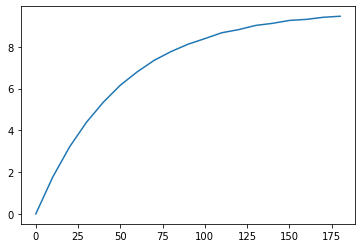

In [24]:
# just plot quickly, with no labels, etc.
plt.plot(time_sec,signal)

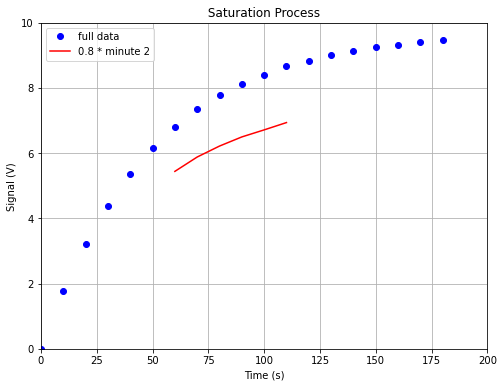

In [25]:
# plot the data we've been looking at properly, plus the minute 2 data as stored in the dataframe, times 0.8

# generate figure with grid, title and axis labels
plt.figure(figsize=(8,6))
plt.grid()
plt.title(' Saturation Process ')
plt.ylabel('Signal (V)')
plt.xlabel('Time (s)')

# add the data

plt.plot(time_sec,signal,'ob',label='full data')    # raw data, plotted as blue circles

# you can do math on the data as you plot it without changing the original data

plt.plot(minute2_df['Time (s)'],0.8*minute2_df['Signal (V)'],'-r',
         label='0.8 * minute 2')      # 0.8 * data, as a red line between points, data in the 2nd minute array

# set axis limits
plt.xlim(0,200)
plt.ylim(0,10)

# print legend
plt.legend();


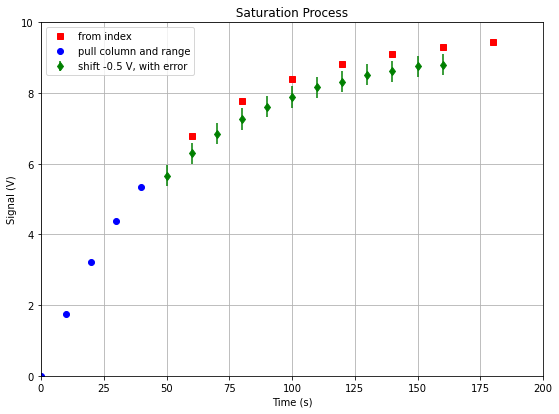

In [26]:
# plot data in 3 ways:
# plot every other point of the data set for minutes 2 and 3 by using range(N,M,P)
# plot first minute, all data points, in a different color
# plot points 6 to 17 with error bars, shifted for clarity

# figure and labels
plt.figure(figsize=(9,6.5))
plt.grid()
plt.title(' Saturation Process ')
plt.ylabel('Signal (V)')
plt.xlabel('Time (s)')

# create index range for first curve
index = list(range(6,rows,2))   # data 6, 8, 10, ... -- the 2 means every 2nd point

# plot data limiting point with index
plt.plot(time_sec[index],signal[index],'sr',label='from index')   # only plot points in index range (red squares)

# plot range put in directly, extract a column from a matrix to plot, blue circles

plt.plot(time_sec[0:5],mydata['Voltage (V)'][0:5],'ob',label='pull column and range') 

# plot with error bars equal to 0.3 Volts, shifted down 0.5 V to be visible, green diamonds

plt.errorbar(time_sec[5:17], signal[5:17] - 0.5,yerr=.3,fmt='dg',label='shift -0.5 V, with error')

# axis range and legend

plt.xlim(0,200)
plt.ylim(0,10)
plt.legend();

# Doing math on your data

If you do an operation on an array or column of numbers, you do the same operation to each element of the array.  

## Built in functions

**Simple operations** are built into the python:

*combining arrays with numbers*

- `B = x*A` :   $B = nA$. `*`  multiplies each element of $A$ by $n$ and stores in $B$ array: $B[p]=x*A[p]$.  Note that $xA$ is assumed to be another object, and ≠ $x*A$
- `C = A**x` :  $C = A^x$. `**` raises each element of $A$ to the power $x$ and stores in $B$ array.  : $C[p]=(A[p])^x$  NOTE:  do not use ^ (shift-6) as this won't do what you want
- `D = A/x` :   $D = \frac{A}{x}$. `/` divides each element of $A$ by $x$: $D[p]=\frac{A[p]}{x}$
- `E = A + x` : $E = A + x$. `+` adds $x$ to each element of $A$: $E[p] = A[p] + x$
- `F = A - x` : $F = A - x$. `-` subtracts $x$ from each element of $A$: $F[p]=A[p]- x$
- `G = x` : If you have already created an array $G$, this puts $x$ into each element of $G$:  $G[p]=x$

If you want to keep the result in $A$, you have two choices:

- `A = x*A`: results in $A[p]=x*(oldA[p])$
- `A *= x` : shorthand for take every element of $A$ and multiply it by $x$, leaving result in $A$.  This also works for addition (+), subtraction (-), division (/), and power (`**`), as long as you have an array.


*combining arrays with each other*

- `G = A + B` : creates an array the same length as A or B, $G[p] = A[p] + B[p]$
- `G = A * B` : $G[p] = A[p] * B[p]$  Note this is different from matrix multiplication - more like columns in an excel sheet.

Below is an example of this math to see how it works (run the cells in a different order and see what happens)



In [27]:
test = np.array([1,2,3])  #create a simple array [1,2,3]
test

array([1, 2, 3])

In [28]:
test+=2   #add 2 to each element
test

array([3, 4, 5])

In [29]:
test**=test  #raise each element to itself (3 cubed, etc)
test

array([  27,  256, 3125])

In [30]:
test = test / [3,4,5]  #divide the first element by 3, 2nd by 4, 3rd by 5
test

array([  9.,  64., 625.])

## Numpy (More complicated) functions

Use the numpy library (abbreviated as np) for more complex operations on your data.  These work on arrays as opposed to generic objects that could be text, etc.  Common ones for the lab include:

- `np.log(x)` : $\ln (x)$
- `np.exp(x)` : $\exp (x) = e^x$
- `np.log10(x)` : $\log (x)$
- `np.sqrt(x)` : $\sqrt{x}$
- `np.sin(x)` : $\sin (x)$, where $x$ is in radians (cos, tan work the same way)
- `np.arcsin(x)` : $\sin ^{-1} (x)$ with the result in radians (arccos, arctan work the same way)
- `np.deg2rad(x)` : $\pi x/180$ (degrees to radians)
- `np.rad2deg(x)` : $180 x/\pi$ (radians to degrees)

A list of numpy functions is at https://numpy.org/doc/stable/reference/ufuncs.html#available-ufuncs.

Below, a simple example of numpy operations on the array [1,2,3], putting the results into a pandas dataframe

In [31]:
# examples
test=np.array([1,2,3])  # create an array
test_df=pd.DataFrame()  # create a data frame and then populate it
test_df['x']=test
test_df['log']=np.log(test)
test_df['exp']=np.exp(test)
test_df['sqrt']=np.sqrt(test)
test_df['atan(rad)']=np.arctan(test)
test_df['atan(deg)']=np.rad2deg(np.arctan(test))
test_df

,x,log,exp,sqrt,atan(rad),atan(deg)
0,1,0.000000,2.718282,1.000000,0.785398,45.000000
1,2,0.693147,7.389056,1.414214,1.107149,63.434949
2,3,1.098612,20.085537,1.732051,1.249046,71.565051


## Creating your own function

If you want to do something that is not a simple function, you can create your own.  

The general format is:

```
def myfunction(x,parameterlist,constant1=val2,constant2=val2):
    result = (some expression involving x, parameters in the parameterlist, and constants)
    return result
```

The first line defines a function of `x` with the name `myfunction` that has parameters you pull in from elsewhere listed in `parameterlist` - this can be an array with the names in it or a comma-delimited list - and then any parameters that you want to set a default value for and don't have to enter every time.  If you do include a number, that will override the default.   

Always end the first line with a colon, and then the next lines define the function.  End with the line `return valuetoreturn`, and then stop indenting.

To call the function, you input values for the x and parameter list.

- `output = myfunction(xval,par1,par2)`

In general, all the arguments of the function, *x*, *par1*, *par2*, *constant1*, etc.  are equivalent.  When using a function for fitting, it is good programming practice to have the first one be the independent variable for your data. The parameters in `parameterlist` can vary when you are fitting to this function (see below), but the constants are set by what you enter when you call the function. 


For example, consider the function for electric potential,

$$V = k_e \frac{q}{r}$$

The value of the constant $k_e$ will depend on our unit system, so we will want to specify it as we run the function sometimes, but not always - we give it a default value.  The potential varies as a function of position $r$, with the curve depending on charge $q$.

In [32]:
# define a function for the Coulomb potential

def v_coulomb(r,q,k_e=9e9):
    pot = 0
    try:
        pot = k_e*q/r         # basic formula that might generate an error
    except ZeroDivisionError: # the error we want to deal with
        return 1e10           # how to deal with that error
    return pot


Notice the use of the try/except structure to avoid dividing by zero.  That has the general format:


```
try:
	expression that might go wrong
except: 
	what to do if it does go wrong.
else:
	what to do if it succeeds
finally:
	what to do no matter what happens 
```
In this case, we have specified the error we expect as ZeroDivisionError.

Below, print out the value of the function at r = 0, and r = 0.1m for q = 2 nanoCoulombs, and then switch the unit system by changing k_e and printing the electric potential for an electron at one Bohr radius.

In [33]:

# check by printing value for 2 nC at 0 and 0.1 meters

out = v_coulomb(0.0,2e-09)          #do not specify k_e, so it uses the default from defining it
print(f'q= 2 nC, r=  0 cm V = {out:0.2e} V')
out = v_coulomb(0.1,2e-09)
print(f'q= 2 nC, r= 10 cm V = {out:0.2e} V')

#set k_e = 27.2, measure q in electrons and r in Bohr radii

out = v_coulomb(-1,1,27.2)       #give a value for k_e that supercedes the one in the fun definition
print(f'q = -e, r = a_o, k_e = 27.2: {out} eV')



q= 2 nC, r=  0 cm V = 1.00e+10 V
q= 2 nC, r= 10 cm V = 1.80e+02 V
q = -e, r = a_o, k_e = 27.2: -27.2 eV


The power of defining a function comes from both doing the same thing repeatedly to an array of data with slightly different parameters, or (later) to allow you to fit that function to your data to determine its parameters.  

To **plot the function** you have created:

First **create an array of equally spaced points** using the command

-`np.linspace(low,high,npts)`

where low is the starting value, high the ending value and npts the number of evenly spaced points.

In [34]:
# create a position array
position=np.linspace(0,50,51)   #use 51 here so the points are 1 unit apart; if 50, the spacing would be 50/51.
position[45:]  #print from the 46th point to the end of the array

array([45., 46., 47., 48., 49., 50.])

Then **calculate the value of the function** for this array of points.

In [35]:
# calculate the potential for charge 3 nC and position 0 to 50 cm
potential=v_coulomb(position/100,3e-9)   #divide position by 100 to get it in meters (the right units for the default k_e)
potential[:5]  #output the first 5 points

<ipython-input-32-2f1ed81b8044>:6: RuntimeWarning: divide by zero encountered in true_divide
  pot = k_e*q/r         # basic formula that might generate an error


array([  inf, 2700., 1350.,  900.,  675.])

Note that the floating point fix we used in the function for when we divide by zero didn't work with the array.  For the array, however, dividing by zero doesn't crash the function.  There are likely numpy ways to get around this, but I don't know what they are.

Do a **quick plot** of the function.

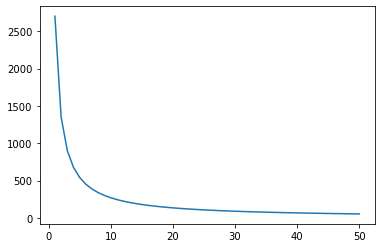

In [36]:
# plot potential vs position without labelling anything
plt.plot(position,potential) 

# Uncertainty

The uncertainties package is a very useful way of dealing with data and carrying its error bars along with it.  It is also smart enough to keep track of those uncertainties when combining data.  You first need to load in the package (done in step `[1]`, but again here for ease)

- `import uncertainties as unc`
- `from uncertainties import ufloat`
- `from uncertainties.umath import *`   $\sin()$, etc.
- `from uncertainties import unumpy`   for doing numpy type operations on uncertainty objects



In [37]:
import uncertainties as unc
from uncertainties import ufloat    #this means you don't have to type unc.ufloat, but can just use ufloat
from uncertainties.umath import *
from uncertainties import unumpy

## Creating uncertainty objects

The uncertainty object is a single object that includes both the nominal value and its standard devation (or error bar).  Anytime you measure something in the lab, you should record both.  You also need to then propagate this uncertainty to your final result, and include it to weight your data when you fit it should it vary across your data (e.g. when the uncertainty $ \delta x \propto \sqrt{x})$.  Propagating uncertainties used to be the hardest part of PHYS 431, but now Python does most of the work for you (although you do still need to understand what is going on).

If you have a single datum, create the uncertainty object:

- `udatum = unc.ufloat(value,error)`

If you have arrays of the data values and their errors (standard deviation)

- `uarray = unumpy.uarray(value_array,error_array)`

If you have a set of data points already stored as uncertainty objects

- `uarray = numpy.array(udatum1,udatum2,udatum3)`

which is the same as
- `uarray = numpy.array(ufloat(val1,err1),ufloat(val2,err2),ufloat(val3,err3)]`




### Extracting from a text array that includes uncertainties

If you have saved a dataframe that has an uncertainty object in it, it gets stored as text with $\pm$ in it.  When you read it back in, you don't have to mess with `split` to pull the data back out.  There is a convenient command `ufloat_fromstr` you can import, and then use to extract the information.  All of the processes below result in the uncertainty object $x = (0.20,0.01)$

- `from uncertainties import ufloat_fromstr`
- `x = ufloat_fromstr("0.20+/-0.01")`
- `x = ufloat_fromstr("(2+/-0.1)e-01")`  # Factored exponent
- `x = ufloat_fromstr("0.20(1)")`  # Short-hand notation
- `x = ufloat_fromstr("20(1)e-2")`  # Exponent notation
- `x = ufloat_fromstr(u"0.20±0.01")`  # Pretty-print form

## Extracting value and error from uncertainty object

If you have an uncertainty object and want to plot or **extract values and/or errors**, use these commands:

- `values = unumpy.nominal_values(uarray)`

- `sigmas = unumpy.std_devs(uarray)`

## Uncertainty object example

Consider two data points, current = $2.01 \pm 0.30$ Amps and voltage = $5.03 \pm 0.40$ Volts, and consider how we find the value and error in the power, $P = I \times V$.  Also, see how different formats print the result.


In [38]:
# create the data (could skip this and put the numbers directly in the next step)
i_0 = 2.01
i_del = 0.30
v_0 = 5.03
v_del = 0.40

# create uncertainty objects
u_i = unc.ufloat(i_0,i_del)
u_v = unc.ufloat(v_0,v_del)

print('default format current:',u_i,'voltage',u_v)   #default printing of uncertainty object

# find power
u_p = u_i*u_v  # P = IV
print('default format power:  ',u_p)

# print with defined sig figs  (see later for more on formatted print)
print('0.1uP format power:   {0:6.1uP}'.format(u_p))
print('0.2uP format power:   {0:6.2uP}'.format(u_p))  #2 sig figs on the error, and truncate value to reflect that
print('0.3uP format power:   {0:6.3uP}'.format(u_p))

# extract nominal values and error from power
p_0=unumpy.nominal_values(u_p)
p_del = unumpy.std_devs(u_p)

print('default format power value', p_0, 'power error', p_del)  #all the decimal values stored


default format current: 2.01+/-0.30 voltage 5.0+/-0.4
default format power:   10.1+/-1.7
0.1uP format power:       10±     2
0.2uP format power:     10.1±   1.7
0.3uP format power:    10.11±  1.71
default format power value 10.110299999999999 power error 1.7098236751197475


Note that the uncertainy object keeps the values out to many significant figures (the last line), but the formatted print type `u` determines how many to print.

To see that this is the correct propagation of error, look at the basic relation for propagating errors in quadrature:

$$P = I \times V$$

$$\frac{\delta P}{P} = \sqrt{\left(\frac{\delta I}{I}\right)^2 + \left(\frac{\delta V}{V}\right)^2}$$
$$\frac{\delta P}{P} = \sqrt{\left(\frac{0.3}{2.0}\right)^2 + \left(\frac{0.4}{5.0}\right)^2}$$
$$\frac{\delta P}{P} =  0.171 $$

Math on an array of uncertainty objects works the same way as this example, applying it row by row.  You should check and understand your error propagation, but it is OK in this lab to let Python do it for you as long as you understand what it is doing.

To plot uncertainty objects, you need to extract the nominal value.  To plot with their error bars, use the plt.errorbars command:

- `plt.errorbar(xarray,unumpy.nominal_values(u_yarray),yerr=unumpy.std_devs(u_yarray)),fmt='or',label='data')`

# Analyzing Data

Once you have your data, you need to analyze it.  Some elements are straight forward - e.g., finding the mean and standard deviation of repeated measurements.  Others require fitting a function to the data and determining the best fit parameters (e.g., the slope and intercept of a best-fit line).


## Maximum, Average, Variance, etc.

Any collection of numbers has a maximum or minimum value (useful for setting the axes on your graph),

a mean:

$$\mu = \frac{1}{N} \sum_{i=1}^N{x_i}$$

a variance:

$$\sigma^2 = \frac{\sum_{i=1}^N{(x_i - \mu)^2}}{N-1}$$

and standard deviation:

$$\sigma = \sqrt{\frac{\sum_{i=1}^N{(x_i - \mu)^2}}{N-1}}$$

Numpy has built in functions to find various features of your array:
- `xmax = np.max(xarray)`$\ \ \ \ \ \ \ $maximum value
- `xmin = np.min(xarray)`$\ \ \ \ \ \ \ $minimum value
- `xmed = np.median(xarray)`$\ \ \ \ \ $median value
- `xave = np.average(xarray)`$\ \ \ $average (mean) value
- `xvar = np.var(xarray)`$\ \ \ \ \ \ \ $variance
- `xstd = np.std(xarray)`$\ \ \ \ \ \ \ $standard deviation

If you have a 2D array, the above commands find these features of the entire array.

In [39]:
print ('maximum signal:  ', np.max(signal))
print ('minimum signal:  ', np.min(signal))
print ('median signal:   ', np.median(signal))
print ('average signal:  ', np.average(signal))
print ('variance:        ', np.var(signal))
print ('std deviation:   ', np.std(signal))
# note that for the 2d array it compares them all, not worrying about units
print ('max of xydata:   ', np.max(xydata))
print ('std dev xydata:  ', np.std(xydata))

maximum signal:   9.46
minimum signal:   0.0
median signal:    8.12
average signal:   6.966842105263158
variance:         7.471705817174513
std deviation:    2.7334421188630484
max of xydata:    180.0
std dev xydata:   56.80987748976108


## Mean and Standard Deviation for multi-dimensional arrays

If you want to take means and standard deviations in different directions in multi-dimensional arrays, and store the result in an array, then use:

- `dataarray.mean()` ( ) or (0) averages all the columns for each row (1) averages all the rows for each column
- `dataarray.std()`

for example, we can find the average time and voltage of the signal we read in before and stored in xydata



In [40]:
#operating on each column and storing the result in array
t_v_mean=xydata.mean(1)
t_v_std =xydata.std(1)
print('means for time, signal  ',t_v_mean)
print('std dev for time, signal',t_v_std)

means for time, signal   [90.          6.96684211]
std dev for time, signal [54.77225575  2.73344212]


To get the mean of just one of the columns:
- `dataarray[1].mean()`

does effectively the same thing as
- `np.average(dataarray[1])`

In [41]:
# show that both syntaxes give the same result

print('xydata[1].mean()     ',xydata[1].mean())
print('np.average(xydata[1])',np.average(xydata[1]))

xydata[1].mean()      6.966842105263158
np.average(xydata[1]) 6.966842105263158


## Fitting Data

When you make a measurement, you generally want to extract some information from the data by fitting it to a function.  You might want to learn the slope of a curve (e.g., measure current as a function of voltage to extract a resistance), or the period of an oscillation, or the position of an observed peak in your data.

Below, we outline the general process, but give a specific example of fitting a line to data.

### aside: Generate some data to fit

To create data to fit, we create a line

- `yarray = m * xarray`

, and then add an array of random noise - this generates random values between 0 and 1.

- `np.random.rand(N)` where `N` is the dimension of the array (in this case `xarray.shape[0]`)

We already created `position` before, so we'll use that as our xarray.

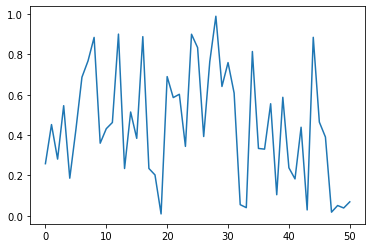

In [42]:
# generate random noise in an array the same length as position
noise = np.random.rand(position.shape[0])
# see what it looks like
plt.plot(position,noise)


Now generate a line and add the noise to it.

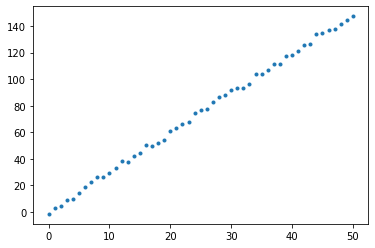

In [43]:
# create fake data
fakedata = 3*position + 6*(noise-0.5)

# see what it looks like
plt.plot(position,fakedata,'.')

## Using lmfit

The `lmfit` package is very convenient for fitting a known function to your data.  There are a number of built in functions, plus you can create your own (either by combining the built-in functions, or doing something new).  You can find a list of other available functions at https://lmfit.github.io/lmfit-py/builtin_models.html.

### Creating Fit Model Functions

To **call a built-in function**, use:

- `from lmfit.models import ModelFromList` 

where `ModelFromList` may be one or more of the following.  The actual functions and the names of the parameters are also given below.

  - `LinearModel()`
     - $f(x;m,b)=mx+b$
     - m is called 'slope';  b= 'intercept'
  - `QuadraticModel()`
     - $f(x;a,b,c)=ax^2+bx+c$
     - parameters called 'a', 'b', 'c'
  - `PolynomialModel(N)`	polynomial of order N
     - $f(x,;c_0,c_1,c_2,…c_N)=c_0+c_1 x+c_2 x^2+⋯+c_N x^N$
     - parameters called c0, c1, c2, … cN
  - `LorentzianModel()`
     - $f(x;A,μ,σ)=\frac{A}{π} \left[\frac{σ}{(x-μ)^2+σ^2}\right]$
     - A = 'amplitude'; μ= 'center'; σ= 'sigma'
  - `PowerLawModel()`
     - $f(x;A,k)=Ax^k$
     - A= 'amplitude'; k= 'exponent'

Think of this as bringing in these as the equivalent of a user-defined function.  To have more than one, you would use:

- `from lmfit.models import LinearModel(),LorentzianModel()`

To include a **user-defined function**, import `Model` from `lmfit`

- `from lmfit import Model`

The next step is to create the model function to fit your data to in terms of either built-in functions (or a combination)

- `model0 = LinearModel()` to fit a line to your data

- `model1 = LinearModel() + LorentzianModel()` to fit a linear background under a Lorentzian peak

or a user-defined function.

- `model2 = Model(myfunction,param_names=['par1','par2',...],const1=val)` to fit to myfunction(x;param_names,constants)

If you want to have two peaks of the same function type, you can add a prefix to the parameter names to tell them apart:

- `model3 = LinearModel() + LorentzianModel(prefix = 'p1_') + LorentzianModel(prefix = 'p2_')`

which will then have parameters slope, intercept, p1_amplitude, p1_center, p1_sigma, p2_amplitude, p2_center, and p2_sigma.


### Setting Parameter Starting Values and Limits

When you fit your function to your data, `lmfit` varies the parameters until the fit runs through your data, typically defined as minimizing the mean-square residual $\sum{\left(data_i - fit(x_i)\right)^2}$.  

It helps to set a starting value for your parameters and/or a range of values that you know will be appropriate (e.g., forcing a value to be positive).  Sometimes you also want to fix one parameter while you vary the others, either because you have measured it elsewhere, or because you want to explore the coupling between two parameters, or you want to focus on a subset of the data where that parameter doesn't have a big impact.  Sometimes, you want to do a fit multiple times, refining the which parameters are free to vary or the range of datapoints you are fitting as you go.  

To set the initial values you can either estimate them yourself or, use the built-in "guess" function to set the initial values (guess works best for simple, built-in models).

Method 1 - estimate the parameters yourself

Create an object to hold the parameters of your model and their settings

- `params_model1 = model1.make_params()`

use `.set()` to establish initial value, limits on varying, and whether or not it is free to vary

- `params_model1['par1'].set(value = val, min = lowlimit, max = highlimit, vary = True/False)`

Note that if you have already done a fit that determined the parameters, you can start from those values when you run the fit again (or you can set a subset of the parameters to the most recent fit).

Method 2 - use the `.guess` feature

- `params_guess_model1 = model1.guess(ydata, x=xdata)`

### Example: Fit a line to x-y data set

- Call in the linear model built-in function

In [44]:
from lmfit.models import LinearModel

- Create the model and print out its parameters

In [45]:
linemodel = LinearModel()
params_line = linemodel.make_params()
params_line

name,value,initial value,min,max,vary
slope,1.00000000,None,-inf,inf,True
intercept,0.00000000,None,-inf,inf,True


To set the initial values of the parameters, we can use the "guess" function from the data.

- `params_guess = model0.guess(ydata,x=xdata)`

In [46]:
params_guess = linemodel.guess(fakedata,x=position)
params_guess

name,value,initial value,min,max,vary
slope,2.97054796,None,-inf,inf,True
intercept,0.42421806,None,-inf,inf,True


Alternatively, we can estimate the slope and intercept from the raw data by looking at the graph, or by extracting from the data the value at x = 0 (intercept) and the ratio of the y-range to the x-range (slope).  For this we use the numpy functions for finding the maximum and minimum of an array

  - `np.max(yarray)`
  - `np.min(yarray)`

In [47]:
# print value of data at zero
print(f'intercept guess at x = 0: {fakedata[0]:0.1f}')

# print range of y over range of x
yrange = np.max(fakedata)-np.min(fakedata)
xrange = np.max(position)-np.min(position)
print('slope guess: {0:0.1f}'.format(yrange/xrange))

intercept guess at x = 0: -1.5
slope guess: 3.0


We can also just choose values by looking at the data or adding our personal knowledge of the system.  For example, if I know I am plotting voltage and current, I fully expect the intercept to be zero.  I thus fix it at zero.

- Set the initial values, potential ranges for them to vary, and whether or not they will vary

In [48]:
# set initial slope to try, and force intercept to be zero  I chose something other than 3 to see how it changes
params_line['slope'].set(value = 2.9, min = 0, max = 30, vary = True)
params_line['intercept'].set(value = 0., vary = False)
params_line

name,value,initial value,min,max,vary
slope,2.90000000,None,0.00000000,30.0000000,True
intercept,0.00000000,None,-inf,inf,False


- fit the data to the model using these starting parameters and store the result
  - `data_fit = model1.fit(ydata, x=xdata, weights = 1/error)`
  
If the `weights` is missing, then all are equally weighted.

Print out the fitting results with 
  - `data_fit.fit_report()`
 
which gives information on how good the fit is and the conditions of the fit.
 

In [49]:
data_fit = linemodel.fit(fakedata,params_line,x=position)
print(data_fit.fit_report())

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 51
    # variables        = 1
    chi-square         = 138.428265
    reduced chi-square = 2.76856530
    Akaike info crit   = 52.9248575
    Bayesian info crit = 54.8566831
[[Variables]]
    slope:      2.98314850 +/- 0.00803105 (0.27%) (init = 2.9)
    intercept:  0 (fixed)


- **Plot the data, fit and residuals** an unformatted way.  Note that data_fit not only has the fitting details in it (extracted with `.fit_report()`), it also contains the difference between the fit and data (residuals) which gets plotted with the default plot command.
  - `data_fit.plot()`

(<Figure size 432x432 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

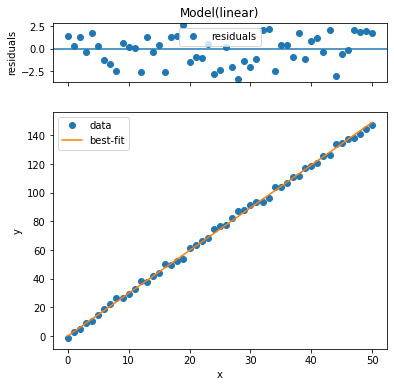

In [50]:
# quick plot of the data
data_fit.plot()

- you can **change the graph size** and other features by creating a name for a plot and giving that plot features.

  - `myfig = plt.figure(figsize = (N,M))` 
  - `data_fit.plot(fig = myfig)`

(<Figure size 720x720 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

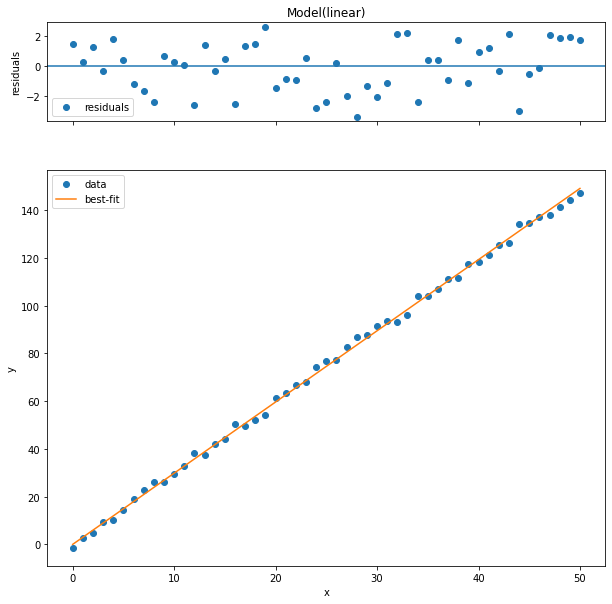

In [51]:
# formatted figure
linefig = plt.figure(figsize = (10,10))
data_fit.plot(fig = linefig)


- To **extract the fitted parameters** stored in the fit object `data_fit` into a dataframe, use `.params`

 - `params_fitted = data_fit.params`

In [52]:
# store the fitted results
params_fitted = data_fit.params
params_fitted

name,value,standard error,relative error,initial value,min,max,vary
slope,2.98314850,0.00803105,(0.27%),2.9,0.00000000,30.0000000,True
intercept,0.00000000,0.00000000,,0.0,-inf,inf,False


Note that the new object now lists the relative error and starting values.

The original parameters are unchanged, and still in the old object.  If you run the cell again, you will again start from these.

In [53]:
params_line

name,value,initial value,min,max,vary
slope,2.90000000,None,0.00000000,30.0000000,True
intercept,0.00000000,None,-inf,inf,False


- **Save the results to an uncertainty object** that can be used in later calculations
  - `u_slope = unc.ufloat(params_fitted['slope'].value,params_fitted['slope'].stderr)`
  - `u_int = unc.ufloat(params_fitted['intercept'].value,params_fitted['intercept'].stderr)`

In [54]:
u_slope = unc.ufloat(params_fitted['slope'].value,params_fitted['slope'].stderr)
u_int = unc.ufloat(params_fitted['intercept'].value,params_fitted['intercept'].stderr)
print(f' slope: {u_slope:0.1uP}   intercept: {u_int:0.2uP}')

 slope: 2.983±0.008   intercept: 0.0±0


Note the slope is about 2 sigma from what we created the fake data with.

Let us now re-do the fit with the intercept is free to vary.

Start by setting the parameters to those from the previous fit:

- `params_line = params_fitted`

and relax the condition on the intercept being fixed in one of two ways:

- `params_line['intercept'].set(vary = True)`

or

- `params_line['intercept'].vary = ['True']`

In [55]:
# starting from the previous fit, relax the constraint on the intercept
params_line = params_fitted
params_line['intercept'].set(vary = True)

# fit the data again, print the parameter values
data_fit2 = linemodel.fit(fakedata,params_line,x=position)
params_fitted2 = data_fit2.params
params_fitted2

name,value,standard error,relative error,initial value,min,max,vary
slope,2.97054799,0.01585239,(0.53%),2.9831485006982628,0.00000000,30.0000000,True
intercept,0.42421728,0.45990200,(108.41%),0.0,-inf,inf,True


In [56]:
# print with proper format
u_slope2 = unc.ufloat(params_fitted2['slope'].value,params_fitted2['slope'].stderr)
u_int2 = unc.ufloat(params_fitted2['intercept'].value,params_fitted2['intercept'].stderr)
print(f' slope: {u_slope2:0.1uP}   intercept: {u_int2:0.1uP}')

 slope: 2.97±0.02   intercept: 0.4±0.5


The intercept is within one sigma of zero, and the slope is now under 2 sigma from 3.0.

Check out the new fit by printing its fit report and doing a quick plot

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 51
    # variables        = 2
    chi-square         = 136.065609
    reduced chi-square = 2.77684917
    Akaike info crit   = 54.0468895
    Bayesian info crit = 57.9105407
[[Variables]]
    slope:      2.97054799 +/- 0.01585239 (0.53%) (init = 2.983149)
    intercept:  0.42421728 +/- 0.45990200 (108.41%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.862


(<Figure size 720x720 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

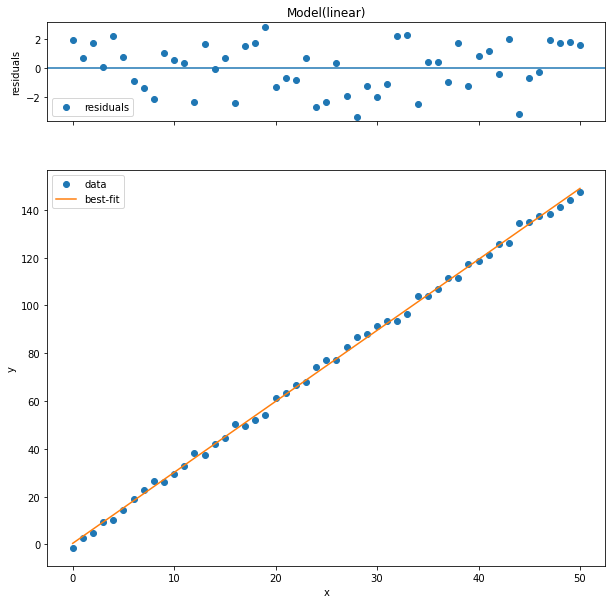

In [57]:
# plot the new fit
linefig = plt.figure(figsize = (10,10))
print(data_fit2.fit_report())
data_fit2.plot(fig=linefig)

# Formatted Printing

When printing data or fitted parameters, it is important to control the number of significant figures.  It is also nice to control column alignment and add text to label the output.

In the print command with formatted text, include the text, and then where you want a formatted variable, put the format in curly brackets.  The generic format is:

- `print('text {0:N.Mz} more text {1:N.Mz}'.format(x1,x2)`

where `x1` and `x2` are the variables to be printed.  In curly brackets, the format is `{P:N.Mz}`, where `P` tells you which variable in the list that is in parenthesis as the object of .format( ) should go where the { } brackets are; `N` is the minimum number of spaces before the next item in the text line (if N=0, the length is whetever the number needs), use `<N` to left justify or `>N` to right justify (the default);  `M` is the number of digits to the right of the decimal point; and `z` is a letter (or two) choosing the type of format, of which common ones are floating point `f`, exponent `E`, or uncertainty `u`.  Adding `P` to E or u makes it "prettier" for an uncertainty object - printing as $10^n$ and $\pm$ instead of `E+0n` and +/-.


Common formats for printing variables:

- `N.Mf` floating point, right justified N spaces from the start, M digits after decimal point 
- `<N.Mf` as above, but left justified, with the next thing starting at least N spaces over.
- `N.ME` in exponential form with `E+0n`, with M digits after the decimal point
- `N.Mu` for an object with uncertainty to print with M total digits in the uncertainty, and the actual object out to that level.
- for uncertainty objects, the f and E formats truncate the digits after the decimal point, and not taking uncertainty into account.  You can also add `P` after the format to make it print with $\times 10^n$ and $\pm$ instead of the E+0n and +/- format.


Below are examples of printing out x1 = 543.21, x2 = 0.1234, and u1 = 12.345 $\pm$ 0.037 with different values of x, and using f, E and u.



In [58]:
# assorted examples of printing formats
x1=543.21
x2=0.1234
u1=unc.ufloat(12.345,0.037)
print('no format command. x1:',x1,' x2:', x2, '  u1:', u1)
print('all without explicit formatting x1: {0}   x2: {1} u1: {2}'.format(x1,x2,u1))
print('all with 8.1f x1: {0:8.1f}   x2: {1:8.2f} u1: {2:8.1f}'.format(x1,x2,u1))
print('all with 8.2f x1: {0:8.2f}   x2: {1:8.2f} u1: {2:8.2f}'.format(x1,x2,u1))
print('all with 10.1E x1: {0:10.1E}   x2: {1:10.1E} u1: {2:10.1E}'.format(x1,x2,u1))
print('uncertainty with  10.1u {0:10.1u}  with 0.2u: {1:10.2u}'.format(u1,u1))
print('uncertainty with 10.1uP {0:10.1uP}   with 0.2uP: {1:10.2uP}'.format(u1,u1))
print('uncertainty with 10.2fP {0:10.2fP}   with 0.2fP: {1:10.2fP}'.format(u1,u1))
print('uncertainty with 10.2EP {0:10.2EP}   with 0.2EP: {1:10.2EP}'.format(u1,u1))

no format command. x1: 543.21  x2: 0.1234   u1: 12.35+/-0.04
all without explicit formatting x1: 543.21   x2: 0.1234 u1: 12.35+/-0.04
all with 8.1f x1:    543.2   x2:     0.12 u1:     12.3+/-     0.0
all with 8.2f x1:   543.21   x2:     0.12 u1:    12.35+/-    0.04
all with 10.1E x1:    5.4E+02   x2:    1.2E-01 u1:    1.2E+01+/-   0.0E+01
uncertainty with  10.1u      12.35+/-      0.04  with 0.2u:     12.345+/-     0.037
uncertainty with 10.1uP      12.35±      0.04   with 0.2uP:     12.345±     0.037
uncertainty with 10.2fP      12.35±      0.04   with 0.2fP:      12.35±      0.04
uncertainty with 10.2EP   1.23×10¹±  0.00×10¹   with 0.2EP:   1.23×10¹±  0.00×10¹


You can do this with fewer characters in Python3: instead of `'text'.format`, you can use `f'text'`

- `print('text {0:N.Mz} more text {1:N.Mz}'.format(x1,x2)`

is the same as
- `print(f'text {x1:N.Mz} more text {x2:N.Mz}')`

In [59]:
print(f'with >10.1 {x1:>10.1f} x')
print(f'with >10.1 {x1:<10.1f} x')
print(f'with  10.2 {x1:10.2f} x')

with >10.1      543.2 x
with >10.1 543.2      x
with  10.2     543.21 x


To get things lined up, you can use the formatting {:'>N'} to right align at the Nth space, or {:'<N'} for left alignment with that many spaces left before the next item prints.

In [60]:
print(f'default  x1: {x1} x2: {x2} u1: {u1}')
print(f'0.2f     x1: {x1:0.2f} x2: {x2:0.2f} u1: {u1:0.2f}')
print(f'0.2f     x1: {x1:0.2f} x2: {x2:0.2f} u1: {u1:0.2fP}')
print(f'>10.2f   x1: {x1:>10.2f} x2: {x2:>10.2f} u1: {u1:>10.2fP}')
print(f'<10.2f   x1: {x1:<10.2f} x2: {x2:<10.2f} u1: {u1:<10.2fP}')

default  x1: 543.21 x2: 0.1234 u1: 12.35+/-0.04
0.2f     x1: 543.21 x2: 0.12 u1: 12.35+/-0.04
0.2f     x1: 543.21 x2: 0.12 u1: 12.35±0.04
>10.2f   x1:     543.21 x2:       0.12 u1:      12.35±      0.04
<10.2f   x1: 543.21     x2: 0.12       u1: 12.35     ±0.04      


# Example from Start to Finish

This example will start from a file with three measurements of the voltage across a slowly charging capacitor, create an uncertainty object that summarizes that dataset, and then fit the data to a user-defined function for exponential saturation, $V(t) = V_o \left(1-e^{t/\tau}\right)$

This is a template for using the code elements described above in this document.

## Load the data

In [61]:
#find the file (see command line [3])
%ls

'Lab Commands.ipynb'   minute2.csv   testdata.csv   threetrial.csv


In [62]:
# read in the file (see command line [5])
trials=pd.read_csv('threetrial.csv')
trials.tail(3)

,Time,Run1,Run2,Run3
16,160,9.49,9.65,9.38
17,170,9.47,9.44,9.64
18,180,9.71,9.61,9.59


## Plot the data
Make a plot to see what the data look like.

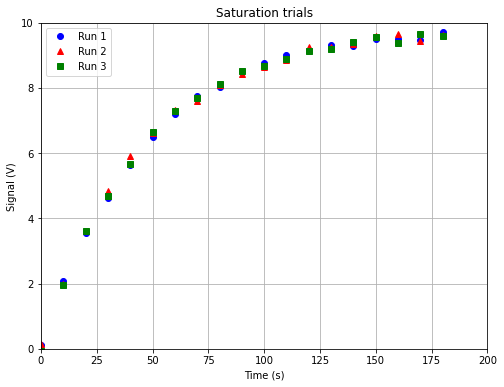

In [63]:
# plot it (see command line 25)
# generate figure with grid, title and axis labels
plt.figure(figsize=(8,6))
plt.grid()
plt.title('Saturation trials')
plt.ylabel('Signal (V)')
plt.xlabel('Time (s)')

# add the data

plt.plot(trials['Time'],trials['Run1'],'ob',label='Run 1')    # raw data
plt.plot(trials['Time'],trials['Run2'],'^r',label='Run 2')    # raw data
plt.plot(trials['Time'],trials['Run3'],'sg',label='Run 3')    # raw data

# set axis limits
plt.xlim(0,200)
plt.ylim(0,10)

# print legend
plt.legend();

## Process the data
Put the data into arrays

In [64]:
# put time into its own array, and then the measurements into a 3 column array (see command lines 15, 18)
time=trials['Time']
measurements=np.array([trials['Run1'],trials['Run2'],trials['Run3']])
measurements

array([[ 0.11,  2.08,  3.54,  4.63,  5.62,  6.5 ,  7.21,  7.76,  8.02,
         8.52,  8.76,  9.01,  9.14,  9.31,  9.29,  9.49,  9.49,  9.47,
         9.71],
       [ 0.14,  1.99,  3.6 ,  4.84,  5.91,  6.61,  7.31,  7.6 ,  8.09,
         8.41,  8.63,  8.86,  9.25,  9.24,  9.33,  9.59,  9.65,  9.44,
         9.61],
       [-0.06,  1.96,  3.62,  4.7 ,  5.68,  6.65,  7.28,  7.69,  8.11,
         8.52,  8.66,  8.88,  9.13,  9.2 ,  9.41,  9.57,  9.38,  9.64,
         9.59]])

Find the average values and estimate the error by taking the standard deviation for each measurement.

In [65]:
# average across the three columns to figure out the mean and standard deviation  (see command line 40)
# store the mean and error bars in individual objects

V_mean=measurements.mean(0)
V_sigma=measurements.std(0)

# use a for loop (command line 17) and formatted printing (line 58) to check that this worked

for x in range(1,3):
    print ('time (s)   {0:0.1f}    value (V)   {1:0.2f}      sigma    {2:0.2f}'.
           format(trials['Time'][x],V_mean[x],V_sigma[x]))


time (s)   10.0    value (V)   2.01      sigma    0.05
time (s)   20.0    value (V)   3.59      sigma    0.03


Put the results into an uncertainty object array

In [66]:
# create a single uncertainty object with the mean and standard deviation for each time point (command line 38)
u_Volts = unumpy.uarray(V_mean,V_sigma)

# print in a formatted way (line 58)
for x in range(1,3):
    print ('time (s)   {0:0.1f}    value (V)   {1:0.1u}'.
           format(trials['Time'][x],u_Volts[x]))

time (s)   10.0    value (V)   2.01+/-0.05
time (s)   20.0    value (V)   3.59+/-0.03


Plot the average, with error bars

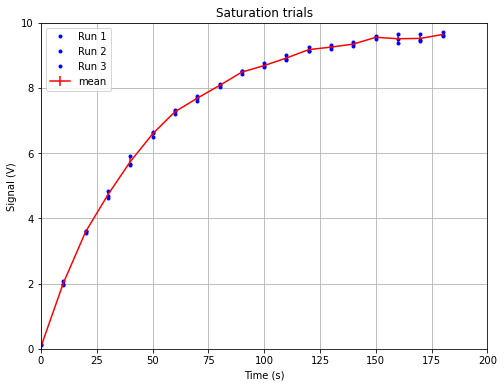

In [67]:
# plot orig data as dots, plus mean with error bars (from command 26)
# generate figure with grid, title and axis labels
plt.figure(figsize=(8,6))
plt.grid()
plt.title('Saturation trials')
plt.ylabel('Signal (V)')
plt.xlabel('Time (s)')

# add the data

plt.plot(trials['Time'],trials['Run1'],'.b',label='Run 1')    # raw data
plt.plot(trials['Time'],trials['Run2'],'.b',label='Run 2')    # raw data
plt.plot(trials['Time'],trials['Run3'],'.b',label='Run 3')    # raw data
plt.errorbar(trials['Time'],V_mean,yerr=V_sigma,fmt='-r',label='mean')

# set axis limits
plt.xlim(0,200)
plt.ylim(0,10)

# print legend
plt.legend();

Define the fitting function for $V = V_o \left(1-e^{-t/\tau}\right)$ to find the parameters $V_o$ and $\tau$

In [68]:
# create a user-defined function (command line 32)
def vsat(t,V_o,tau):
    result = V_o * (1 - np.exp(-t/tau))    # note use np.exp() for exponential, since will be using on a np.array
    return result

In [69]:
# check that it works - 63% at one time constant
print(vsat(40,10,40))

6.321205588285577


## Fit the data

First set up the model and the parameter initial values.  From the graph, it is saturating at a level a little under 10 V, and the 63% point is around 50 seconds.  Use those as the starting values of the function parameters.

In [70]:
# bring in the class "Model" for fitting to a user-defined function (command line 44)
from lmfit import Model

# create the model and its parameter settings 
mymodel1=Model(vsat,param_names=['V_o','tau'])  #define the model function & parameters (line 45)
myparams=mymodel1.make_params()   #make a dataframe of the fitting parameters (line 45)
myparams['V_o'].set(value=10,min=0,max=20,vary=True)      #force to be positive (line 48)
myparams['tau'].set(value=50,min=0.0,max=100,vary=True)   #starting values from plot
myparams

name,value,initial value,min,max,vary
V_o,10.0000000,None,0.00000000,20.0000000,True
tau,50.0000000,None,0.00000000,100.000000,True


Fit the data, and do the lmfit built in print out of parameters and quick plot to check fit quality.

[[Model]]
    Model(vsat)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 13
    # data points      = 19
    # variables        = 2
    chi-square         = 19.4183163
    reduced chi-square = 1.14225390
    Akaike info crit   = 4.41377779
    Bayesian info crit = 6.30265574
[[Variables]]
    V_o:  9.79457710 +/- 0.03071219 (0.31%) (init = 10)
    tau:  44.7609480 +/- 0.45237054 (1.01%) (init = 50)
[[Correlations]] (unreported correlations are < 0.100)
    C(V_o, tau) =  0.839


(<Figure size 432x432 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

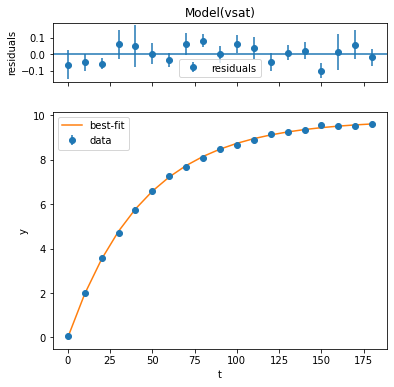

In [71]:
# Fit the data (command line 49)
v_fit = mymodel1.fit(V_mean,myparams,t=time,weights=1/V_sigma)   #weight by 1/error bars

# print report (command line 49)
print(v_fit.fit_report())

#quick plot (command line 50)
v_fit.plot()

## Extract the Results
Extract the parameters into uncertainty objects and print nicely.

In [72]:
# put the parameters into an object (command line 52)
params=v_fit.params
params    #print as a dataframe

name,value,standard error,relative error,initial value,min,max,vary
V_o,9.79457710,0.03071219,(0.31%),10,0.00000000,20.0000000,True
tau,44.7609480,0.45237054,(1.01%),50,0.00000000,100.000000,True


In [73]:
# create uncertainty objects and print with appropriate significant figures (command line 54)
V_o_u=ufloat(v_fit.params['V_o'].value,v_fit.params['V_o'].stderr)
tau_u=ufloat(v_fit.params['tau'].value,v_fit.params['tau'].stderr)
print('Amplitude V_o = {0:0.1u} V    time constant 𝛕 = {1:0.1u} s'.format(V_o_u,tau_u))

Amplitude V_o = 9.79+/-0.03 V    time constant 𝛕 = 44.8+/-0.5 s


The initial values used to generate the data in the first place were $V_o = 9.80\ V; \tau = 45.0\ s$, and the output of the fit is $V_o = 9.79 \pm 0.03\ V; \tau = 44.8 \pm 0.05\ s$, so this worked.  Both values are within one standard deviation of the nominal value.  The uncertainty objects are now ready to use for the next step of the data analysis.

Finally, replot with labelling that reflects the experiment and the fitted curve having a higher point density than the raw data.

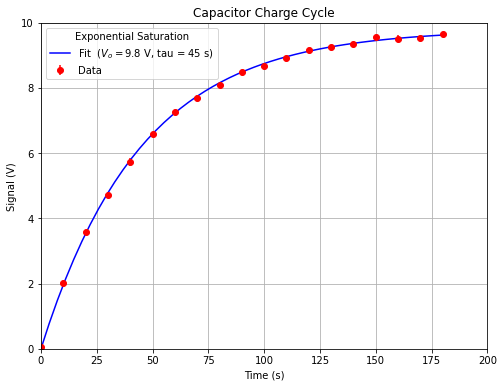

In [74]:
# generate fitted curve with higher density (command line 34)

fit_x=np.linspace(0,np.max(time),50)
fit_y=v_fit.eval(v_fit.params,t=fit_x)

# plot data as mean with error bars and fit as a line (command line 26)

plt.figure(figsize=(8,6))
plt.grid()
plt.title('Capacitor Charge Cycle')
plt.ylabel('Signal (V)')
plt.xlabel('Time (s)')

# add the data

plt.errorbar(trials['Time'],V_mean,yerr=V_sigma,fmt='or',label='Data')
plt.plot(fit_x,fit_y,'-b',label='Fit  ($V_o=9.8$ V, tau = 45 s)')

# set axis limits
plt.xlim(0,200)
plt.ylim(0,10)

# print legend
plt.legend(title='Exponential Saturation');